<a href="https://colab.research.google.com/github/kodooraKILLER/knights-internship-/blob/master/knight_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine prediction
### A Knight FinTech internship problem statement

**Introduction**
--
Imagine you are working as a Data Scientist for an Online Wine Shop named “The Wine Land”. As the name suggests, the online store specializes in selling different varieties of wines. The online store receives a decent amount of traffic and reviews from its users. Leverage the “reviews” data and draw actionable insights from it.


**What is Expected?**
--
Build a predictive model for predicting the wine “variety”. Provide the output along with all features to a CSV file. Both Training & test data is provided here
Submit the source code used for building models in a zip or share the link to the GitHub repository.
Also submit a short summary: Model used, features extracted, Model accuracy in train. Along with some visualization of data and top 5 actionable Insights from the Data.
.

**Data Description** 
---
1. user_name - user_name of the reviewer
2. country -The country that the wine is from.
3. review_title - The title of the wine review, which often contains the vintage.
4. review_description - A verbose review of the wine.
5. designation - The vineyard within the winery where the grapes that made the wine are from.
6. points - ratings given by the user. The ratings are between 0 -100.
7. price - The cost for a bottle of the wine
8. province - The province or state that the wine is from.
9. region_1 - The wine-growing area in a province or state (ie Napa).
10. region_2 - Sometimes there are more specific regions specified within a wine-growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank.
11. winery - The winery that made the wine
12. variety - The type of grapes used to make the wine. Dependent variable for task 2 of the assignment

**Deadline**
---
9:30 am, 11th May 2020.

## STEP 0: Initialisation and pre-modelling study

Here, we perform the following tasks:
1. import the required libraries
2. import train and test data
3. perform a study on the available data


In [5]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [9]:
#train data is saved in 'raw' dataframe
import io
raw=pd.read_csv(io.BytesIO(uploaded['train.csv']))
raw.drop_duplicates(keep="first",inplace=True,ignore_index=True) 
raw.info()
raw.head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77641 entries, 0 to 77640
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           59105 non-null  object 
 1   country             77608 non-null  object 
 2   review_title        77641 non-null  object 
 3   review_description  77641 non-null  object 
 4   designation         55458 non-null  object 
 5   points              77641 non-null  int64  
 6   price               72356 non-null  float64
 7   province            77608 non-null  object 
 8   region_1            65680 non-null  object 
 9   region_2            33814 non-null  object 
 10  winery              77641 non-null  object 
 11  variety             77641 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.1+ MB


,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec
5,@wineschach,Argentina,Andean 2005 Finca La Escondida Reserva Caberne...,"Strident aromas of licorice, herbs, berries an...",Finca La Escondida Reserva,85,13.0,Other,San Juan,NaN,Andean,Cabernet Sauvignon
6,@wawinereport,US,Gordon Estate 2012 Tradition Red (Columbia Val...,"Half Syrah and half Cabernet Sauvignon, with 4...",Tradition,91,45.0,Washington,Columbia Valley (WA),Columbia Valley,Gordon Estate,Red Blend
7,@vboone,US,Rock Wall 2014 Monte Rosso Reserve Zinfandel (...,"High-toned red fruit stars in this wine, a nic...",Monte Rosso Reserve,90,50.0,California,Sonoma County,Sonoma,Rock Wall,Zinfandel
8,@paulgwine,US,Elizabeth Chambers 2014 Falcon Glen Vineyard P...,"Displaying typical McMinnville AVA subtlety, t...",Falcon Glen Vineyard,91,48.0,Oregon,McMinnville,Willamette Valley,Elizabeth Chambers,Pinot Noir
9,@kerinokeefe,Italy,Mannucci Droandi 2009 Ceppeto Riserva (Chiant...,This blend of Sangiovese and 10% Merlot opens ...,Ceppeto Riserva,86,31.0,Tuscany,Chianti Classico,NaN,Mannucci Droandi,Red Blend


In [10]:
#test data is saved in 'raw_test' dataframe
raw_test=pd.read_csv("D:\\Office Desk\\Internship\\Knight ML Assignment\\Data\\test.csv")
raw_test.info()
raw_test.head(10)


FileNotFoundError: ignored

In [0]:
raw_test.isnull().sum()

In [11]:
raw.isnull().sum()

user_name             18536
country                  33
review_title              0
review_description        0
designation           22183
points                    0
price                  5285
province                 33
region_1              11961
region_2              43827
winery                    0
variety                   0
dtype: int64

# FINAL PROPOSAL : Deep Learning on review_title

We can use review_title to predict the variety of wine used. The words used in the review_title can be used to predict the variety using this method.

## STEP 0: Preprocess Review_title

1. Remove punctuations, replace '-' with ' '
2. convert all cases to lowercase.
3. Add all unique words to a dictionary
4. Convert each review_title into a numpy tensor

In [12]:
df_raw=raw.loc[:,['review_title','variety']]
c=0
for review in df_raw['review_title']:
    new=""
    for i in review:
        if(i==' ' or i.isalpha()):
            new=new+i.lower()
        else:
            if(i=='-'):
                new=new+' '
        
    df_raw['review_title'][c]=new
    c+=1
    
c=0
for variety in df_raw['variety']:
    new=""
    for i in variety:
        if(i==' ' or i.isalnum()):
            new=new+i.lower()
        else:
            if(i=='-'):
                new=new+' '
        
    df_raw['variety'][c]=new
    c+=1
df_raw.head(100)


,review_title,variety
0,andrew peace peace family vineyard chardonnay...,chardonnay
1,north by northwest red columbia valley wa,red blend
2,renato ratti conca barolo,nebbiolo
3,domaine lancienne cure labbaye white bergerac...,bordeaux style white blend
4,château du cèdre le cèdre vintage malbec vin ...,malbec
...,...,...
95,el capricho reserve cabernet sauvignon,cabernet sauvignon
96,pahlmeyer pinot noir sonoma coast,pinot noir
97,ramey annum cabernet sauvignon napa valley,cabernet sauvignon
98,tenuta monteti caburnio red toscana,red blend


In [0]:
#df_raw['variety']=raw['variety']
#print(sorted(df_raw['variety'].unique()),len(df_raw['variety'].unique()))
for review in df_raw['review_title']:
    for i in review:
        if i.isupper():
            print(review)

In [14]:
#make unique word arrays:
raw_dict={}
for variety in df_raw['variety']:
    words=variety.split()
    for word in words:
        if(word in raw_dict.keys()):
            ;
        else:
            raw_dict[word]=0
        
'''
WHY DO WE DO THIS??
We do this so that if in case the review contains the name of the variety itseld, then the system will find it easy to learn 
faster. Also, we are only adding the words in each variety to the dictonary, with each of its value being zero. The value increases
only if the word occurs in any of review_title.

WHY A DICTIONARY?
Our aim is to create an input tensor for each review title which says the presence(1) or absence(0) of the most frequently used words.
For this, we need to create a dictionary with all the words and the number of occurences of each word throughout the review_title column.
Then, we convert each review_title into an input tensor of our wish.
'''
print(raw_dict)
for review in df_raw['review_title']:
    words=review.split()
    for word in words:
        if(word in raw_dict.keys()):
            raw_dict[word]+=1
        else:
            raw_dict[word]=1
print(len(raw_dict))

{'chardonnay': 0, 'red': 0, 'blend': 0, 'nebbiolo': 0, 'bordeaux': 0, 'style': 0, 'white': 0, 'malbec': 0, 'cabernet': 0, 'sauvignon': 0, 'zinfandel': 0, 'pinot': 0, 'noir': 0, 'blanc': 0, 'gamay': 0, 'grüner': 0, 'veltliner': 0, 'sangiovese': 0, 'syrah': 0, 'franc': 0, 'portuguese': 0, 'rhône': 0, 'rosé': 0, 'champagne': 0, 'merlot': 0, 'riesling': 0, 'sparkling': 0, 'grigio': 0, 'tempranillo': 0, 'gris': 0, 'gewürztraminer': 0}
26793


**NOTE**
---
As it can be seen, there are 34305 unique words used in the review_title column. Creating an input tensor of length 34305 would be difficult as the learning rate will be slow. Hence, we only take those unique words into consideration that occur more than once.

In [15]:
import collections
sort=sorted(raw_dict.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)  
sort_dict ={}
sort_dict= collections.OrderedDict(sort)
print(sort_dict)

OrderedDict([('valley', 19675), ('red', 10917), ('pinot', 10737), ('sauvignon', 10552), ('de', 9135), ('noir', 8862), ('vineyard', 8522), ('cabernet', 8287), ('chardonnay', 7154), ('château', 5528), ('blanc', 4340), ('estate', 4192), ('riesling', 3921), ('rosé', 3817), ('wa', 3516), ('reserve', 3449), ('napa', 3415), ('santa', 3282), ('la', 3256), ('domaine', 3242), ('syrah', 3151), ('columbia', 3056), ('county', 2913), ('sonoma', 2825), ('white', 2737), ('river', 2599), ('di', 2555), ('hills', 2395), ('merlot', 2392), ('nv', 2380), ('brut', 2358), ('russian', 2262), ('reserva', 2191), ('zinfandel', 2116), ('malbec', 2057), ('coast', 1964), ('california', 1833), ('vineyards', 1817), ('bordeaux', 1788), ('côtes', 1753), ('cru', 1716), ('walla', 1648), ('sparkling', 1647), ('les', 1604), ('mendoza', 1518), ('cuvée', 1511), ('creek', 1502), ('willamette', 1485), ('saint', 1470), ('du', 1378), ('cellars', 1375), ('dry', 1360), ('del', 1359), ('alsace', 1353), ('robles', 1347), ('mountain',

In [16]:
prefinal_dict={}
for key in sort_dict.keys():
    if(sort_dict[key]>1):
        prefinal_dict[key]=sort_dict[key]

        
sort=sorted(prefinal_dict.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)  
dictionary ={}
dictionary = collections.OrderedDict(sort)

i=0
revdict={}
for word in dictionary.keys():
    dictionary[word]=i
    revdict[i]=word
    i+=1
    
print(dictionary)



OrderedDict([('valley', 0), ('red', 1), ('pinot', 2), ('sauvignon', 3), ('de', 4), ('noir', 5), ('vineyard', 6), ('cabernet', 7), ('chardonnay', 8), ('château', 9), ('blanc', 10), ('estate', 11), ('riesling', 12), ('rosé', 13), ('wa', 14), ('reserve', 15), ('napa', 16), ('santa', 17), ('la', 18), ('domaine', 19), ('syrah', 20), ('columbia', 21), ('county', 22), ('sonoma', 23), ('white', 24), ('river', 25), ('di', 26), ('hills', 27), ('merlot', 28), ('nv', 29), ('brut', 30), ('russian', 31), ('reserva', 32), ('zinfandel', 33), ('malbec', 34), ('coast', 35), ('california', 36), ('vineyards', 37), ('bordeaux', 38), ('côtes', 39), ('cru', 40), ('walla', 41), ('sparkling', 42), ('les', 43), ('mendoza', 44), ('cuvée', 45), ('creek', 46), ('willamette', 47), ('saint', 48), ('du', 49), ('cellars', 50), ('dry', 51), ('del', 52), ('alsace', 53), ('robles', 54), ('mountain', 55), ('paso', 56), ('the', 57), ('barolo', 58), ('champagne', 59), ('grand', 60), ('classico', 61), ('lakes', 62), ('gris',

In [17]:
len(dictionary)
len(revdict)

17510

In [18]:
res={}
for review in raw_test['review_title']:
    words=review.split()
    if word.lower() not in dictionary.keys() and word.lower() not in res.keys:
        res[word.lower()]=1

print(res)

NameError: ignored

**DICTIONARY RESULT**
--
It is very clear that all words in the resulting dictionary are present in both train and test datasets. The dictionary contains all unique words along with a distinct number, from 0 to 17519, where 0 denotes the most used word, while 17519 denotes the least used word. The length of the dictionary is 17510. So, for each review_title, we create a numpy 1 dimensional array of length 17510 that shows the presence (1) or absence (0) of the top 17510 most frequently used words (ie all words in 'review_title' column of train dataset that occur more than once.


In [0]:
def review_to_tensor(review):
    #preprocessing of review, removing punctuations, uppercases, etc.
    review=review.lower()
    new=""
    for i in review:
        if(i==' ' or i.isalpha()):
            new=new+i.lower()
        else:
            if(i=='-'):
                new=new+' '
      
    review=new
    #preprocessing done, now numpy 1D array conversion
    
    tensor=np.zeros(17510)
    for word in review.split():
        if word in dictionary.keys():
            tensor[dictionary[word]]=1
    return tensor

def tensor_to_review(tensor):
    review=""
    for i in range(0,len(tensor)):
        if(tensor[i]==1):
            review+=" "
            review+=revdict[i]
    return review
#NOTE: The review returned is not the exact match, it is a sequence of un-arranged and preprocessed words.  
    
    
    #preprocessing of review, removing punctuations, uppercases, etc

In [20]:
print(tensor_to_review(review_to_tensor(raw_test['review_title'][0])),"\n",raw_test['review_title'][0])

NameError: ignored

In [0]:
#all reviews mapped to top 17510 frequentlyused words, 1-present, 0-absent
x_tensor=np.zeros((len(df_raw['review_title']),17510),dtype='uint8')
iter=0
for review in df_raw['review_title']:
    x_tensor[iter]=review_to_tensor(review)
    iter+=1
x_tensor.shape

In [22]:
class_dict={}
rev_class_dict={}
i=0
for variety in df_raw['variety'].unique():
    class_dict[variety]=i
    rev_class_dict[i]=variety
    i+=1
df_raw.replace({'variety':class_dict},inplace=True)
print(class_dict)

{'chardonnay': 0, 'red blend': 1, 'nebbiolo': 2, 'bordeaux style white blend': 3, 'malbec': 4, 'cabernet sauvignon': 5, 'zinfandel': 6, 'pinot noir': 7, 'sauvignon blanc': 8, 'gamay': 9, 'grüner veltliner': 10, 'bordeaux style red blend': 11, 'sangiovese': 12, 'syrah': 13, 'white blend': 14, 'cabernet franc': 15, 'portuguese red': 16, 'portuguese white': 17, 'rhône style red blend': 18, 'rosé': 19, 'champagne blend': 20, 'merlot': 21, 'riesling': 22, 'sparkling blend': 23, 'pinot grigio': 24, 'tempranillo': 25, 'pinot gris': 26, 'gewürztraminer': 27}


In [0]:
df_raw

In [0]:
from keras.utils.np_utils import to_categorical
y_tensor=to_categorical(df_raw['variety'])
def tensor_to_variety(tensor):
    for i in range(0,len(tensor)):
        if(tensor[i]):
            return rev_class_dict[i]

In [24]:

print('original data:\nReview title: \t',(df_raw['review_title'][0]),'\nVariety: \t',(df_raw['variety'][0]),"\n")
print('tensor answers:\nReview title: \t',(x_tensor[0]),'\nVariety: \t',(y_tensor[0]),"\n")
print('rev answers:\nReview title: \t',tensor_to_review(x_tensor[0]),'\nVariety: \t',tensor_to_variety(y_tensor[0]),"\n")

original data:
Review title: 	 andrew peace  peace family vineyard chardonnay south eastern australia 
Variety: 	 0 

tensor answers:
Review title: 	 [0 0 0 ... 0 0 0] 
Variety: 	 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.] 

rev answers:
Review title: 	  vineyard chardonnay family south australia eastern andrew peace 
Variety: 	 chardonnay 



In [25]:
x_train,x_val,y_train,y_val=train_test_split(x_tensor,y_tensor,random_state=1)
print('train data shape: ',x_train.shape)
print('train labels shape: ',y_train.shape)
print('validation data shape: ',x_val.shape)
print('validation labels shape: ',y_val.shape)

train data shape:  (58230, 17510)
train labels shape:  (58230, 28)
validation data shape:  (19411, 17510)
validation labels shape:  (19411, 28)


**END OF STEP 0**
--
   The input and output tensors are ready to be fed to the to-be-built model. Dictionaries and reverse dictionaries are prepared. Data is normalised, preprocessed and is now ready to be fed. Train and test tensors are successfully split in a 80-20 ratio. We may now proceed to building the model.

# STEP 1: Model Building

## MODEL v1
#### The BASE model
   
   The initial features of the to-be-built model are listed as follows:
1. 4 Layered Dense Artificial Neural Network, 64-128-256-28 widths
2. Input tensor size=17510, output tensor size=28
3. loss function=categorical cross entropy
4. optimizer=RMSprop optimizer
5. Initial train=100 epochs

In [0]:
from keras import models
from keras import layers
from keras import optimizers
model=models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(17510,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(28, activation='softmax'))

In [0]:
model.compile(optimizer=optimizers.RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=512,
    validation_data=(x_val,y_val))
model.save('D:\\Office Desk\\Internship\\Knight ML Assignment\\v1.h5')

In [0]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(12,12))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy: v1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('D:\\Office Desk\\Internship\\Knight ML Assignment\\v1_acc.jpeg')

plt.show()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(12,12))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss: v1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('D:\\Office Desk\\Internship\\Knight ML Assignment\\v1_loss.jpeg')

plt.show()

# MODEL V2:
#### The LESS COMPLEX model

   The initial features of the to-be-built model (v2) are listed as follows:
1. 3 Layered Dense Artificial Neural Network, 16-32-28 widths
2. Input tensor size=17510, output tensor size=28
3. loss function=categorical cross entropy
4. optimizer=RMSprop optimizer
5. Initial train=100 epochs

In [0]:
from keras import models
from keras import layers
from keras import optimizers
modelv2=models.Sequential()
modelv2.add(layers.Dense(8, activation='relu',input_shape=(17510,)))
modelv2.add(layers.Dense(16, activation='relu'))
modelv2.add(layers.Dense(28, activation='softmax'))

In [0]:
modelv2.compile(optimizer=optimizers.RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])
historyv2=modelv2.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=512,
    validation_data=(x_val,y_val))
model.save('D:\\Office Desk\\Internship\\Knight ML Assignment\\v2.h5')

In [0]:

acc = historyv2.history['accuracy']
val_acc = historyv2.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(12,12))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy: v2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('D:\\Office Desk\\Internship\\Knight ML Assignment\\v2_acc.jpeg')

plt.show()

loss = historyv2.history['loss']
val_loss = historyv2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(12,12))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss: v2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('D:\\Office Desk\\Internship\\Knight ML Assignment\\v2_loss.jpeg')

plt.show()

# MODEL V3:
#### The OverFitting Manager model

   The initial features of the to-be-built model (v2) are listed as follows:
1. 3 Layered Dense Artificial Neural Network, 16-32-28 widths
2. Input tensor size=17510, output tensor size=28
3. loss function=categorical cross entropy
4. optimizer=RMSprop optimizer
5. Initial train=100 epochs
6. Dropout of 0.5

In [0]:
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers
modelv4=models.Sequential()
modelv4.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001),input_shape=(17510,)))
modelv4.add(layers.Dropout(0.5))
modelv4.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
modelv4.add(layers.Dropout(0.5))
modelv4.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
modelv4.add(layers.Dropout(0.5))
modelv4.add(layers.Dense(28, activation='softmax'))

In [0]:
from keras import metrics
modelv4.compile(optimizer=optimizers.RMSprop(lr=1e-4),loss='categorical_crossentropy',metrics=[metrics.Precision(),metrics.Recall()])
historyv4=modelv4.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=512,
    validation_data=(x_val,y_val))
modelv4.save('v4.h5')

In [0]:
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers
modelv5=models.Sequential()
modelv5.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001),input_shape=(17510,)))
modelv5.add(layers.Dropout(0.5))
modelv5.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
modelv5.add(layers.Dropout(0.5))
modelv5.add(layers.Dense(28, activation='softmax'))

In [0]:
from keras import metrics
modelv5.compile(optimizer=optimizers.RMSprop(lr=1e-4),loss='categorical_crossentropy',metrics=[metrics.Precision(),metrics.Recall()])
historyv5=modelv5.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=512,
    validation_data=(x_val,y_val))
modelv5.save('v5.h5')

In [0]:
arr=np.zeros(len(x_tensor))
for i in range(0,len(x_tensor)):
    y_predicted = modelv4.predict(x_tensor[i:i+1])
    maximum = np.max(y_predicted)
    index_of_maximum = np.where(y_predicted == maximum)
    val=index_of_maximum[1][0]
    arr[i]=val



#df_raw['Predicted variety'] =arr
#print(arr)
#print(df_raw.head())
#datafile.to_csv("E:\\ML Online\\Module 3\\Datasets\\placement.csv")
count=0
val=0
for i in range(0,len(df_raw['variety'])):
    if(df_raw['variety'][i]==df_raw['Predicted variety'][i]):
        val+=1
    count+=1
print(val,count,val*100/count)

In [0]:
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers
modelv2=models.Sequential()
modelv2.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001),activation='relu',input_shape=(17510,)))
modelv2.add(layers.Dense(28, activation='softmax'))

In [28]:
from keras import metrics
from keras import regularizers
modelv2.compile(optimizer=optimizers.RMSprop(),loss='categorical_crossentropy',metrics=['accuracy',metrics.Precision(),metrics.Recall()])
historyv2=modelv2.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=512,
    validation_data=(x_val,y_val))
modelv2.save('v2.h5')

Train on 58230 samples, validate on 19411 samples
Epoch 1/100
58230/58230 [==============================] - 7s 124us/step - loss: 2.5663 - accuracy: 0.6071 - precision_2: 0.9966 - recall_2: 0.0100 - val_loss: 1.9013 - val_accuracy: 0.6526 - val_precision_2: 0.9975 - val_recall_2: 0.1029
Epoch 2/100
58230/58230 [==============================] - 7s 118us/step - loss: 1.4516 - accuracy: 0.7634 - precision_2: 0.9893 - recall_2: 0.3320 - val_loss: 1.0853 - val_accuracy: 0.8347 - val_precision_2: 0.9827 - val_recall_2: 0.5079
Epoch 3/100
58230/58230 [==============================] - 7s 119us/step - loss: 0.8323 - accuracy: 0.8781 - precision_2: 0.9752 - recall_2: 0.6628 - val_loss: 0.6421 - val_accuracy: 0.9077 - val_precision_2: 0.9648 - val_recall_2: 0.7812
Epoch 4/100
58230/58230 [==============================] - 7s 119us/step - loss: 0.5367 - accuracy: 0.9185 - precision_2: 0.9629 - recall_2: 0.8448 - val_loss: 0.4657 - val_accuracy: 0.9268 - val_precision_2: 0.9638 - val_recall_2: 0

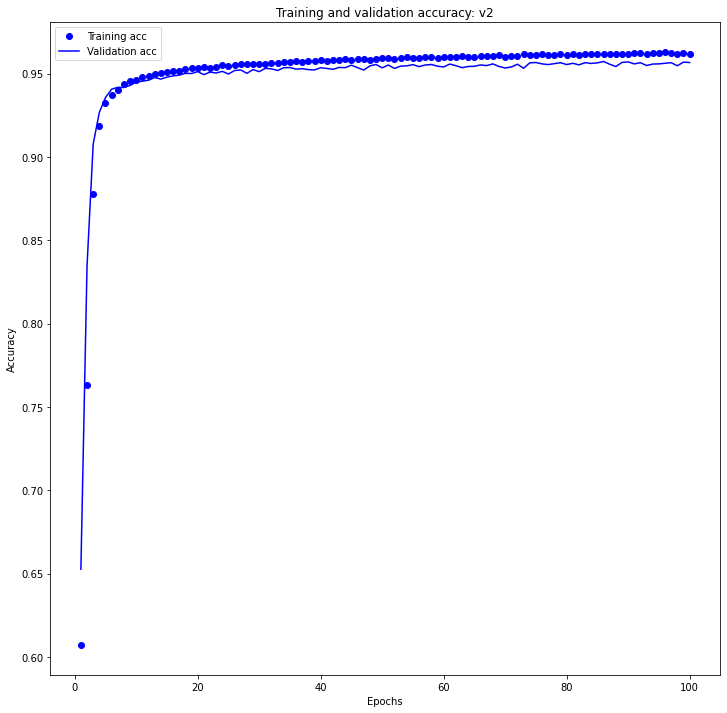

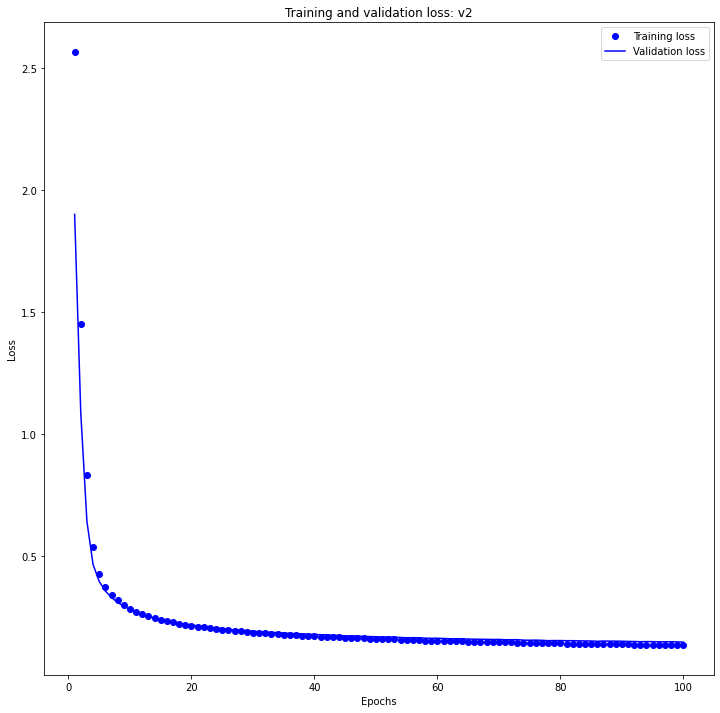

In [30]:

acc = historyv2.history['accuracy']
val_acc = historyv2.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(12,12))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy: v2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('v2_acc.jpeg')

plt.show()

loss = historyv2.history['loss']
val_loss = historyv2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(12,12))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss: v2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('v2_loss.jpeg')

plt.show()

In [0]:
x_tensor2=[]
for review in df_raw['review_title']:
    arr=list()
    
    for word in review.split():
        if(word not in dictionary.keys()):
            ;
        else:
            arr.append(dictionary[word]+1)
        
    x_tensor2.append(arr)


In [0]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x_tensor2,y_tensor)
#preprocessing:

from keras.preprocessing import sequence
max_len=50
x_train2 = sequence.pad_sequences(x_train2, maxlen=max_len)
x_test2 = sequence.pad_sequences(x_test2, maxlen=max_len)


In [0]:
modelv6=models.Sequential()

modelv6.add(layers.Embedding(17511, 32, input_length=50))
modelv6.add(layers.Conv1D(32,4, activation='relu'))
modelv6.add(layers.MaxPooling1D(4))
modelv6.add(layers.Conv1D(32, 4, activation='relu'))
modelv6.add(layers.GlobalMaxPooling1D())
modelv6.add(layers.Dense(28, activation='sigmoid'))
modelv6.summary()

In [0]:
modelv6.compile(optimizer=optimizers.RMSprop(),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
historyv6 = modelv6.fit(x_train2, y_train2,
    epochs=50,
    #batch_size=512,
    #validation_split=0.2
    )

In [0]:
from keras import models
model=models.load_model('v2.h5')

In [6]:
print(modelv2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                560352    
_________________________________________________________________
dense_2 (Dense)              (None, 28)                924       
Total params: 561,276
Trainable params: 561,276
Non-trainable params: 0
_________________________________________________________________
None
